# NSW PCB 
here we can read stuff from DB.

Just hit ctrl-enter on the first field, then on each field you want to execute

In [1]:
from ROOT import TSQLServer

#we connect to the "read-only" database. The user/password is unique for all the MM databases in the CERN oracle DB 
db=TSQLServer.Connect("oracle://db-d0002.cern.ch:10654/int8r_external","ATLAS_MUON_NSW_MM_READER", "NSWreadme2016")

Welcome to ROOTaaS 6.06/02


### In the following field you will get the IDs of the boards registered in the DB

In [2]:
#the queries have the usual SQL fomat
sql = "SELECT id_ls, id_se, id_n, id_n2 FROM atlas_muon_nsw_mm_pcb.hv"

#here we actually execute the query
res = db.Query(sql)

#the fields are the SELECTed columns of the SQL table(s)
nfields = res.GetFieldCount()

#the rows are the data
nrows = res.GetRowCount()
for i in range(nrows):
    #with this function we go to the next row of data
    row = res.Next()
    
    #here we just arrange the IDs in our preferred way
    PCB_ID=''
    for j in range(nfields):
        if (j>2):
            if (int(row.GetField(j))<10):
                PCB_ID+='0'
        PCB_ID+=row.GetField(j)
    print PCB_ID

ls501
ls102
ls106
ls201
ls401
ls105


### The following is just an example of a plot of some DB content

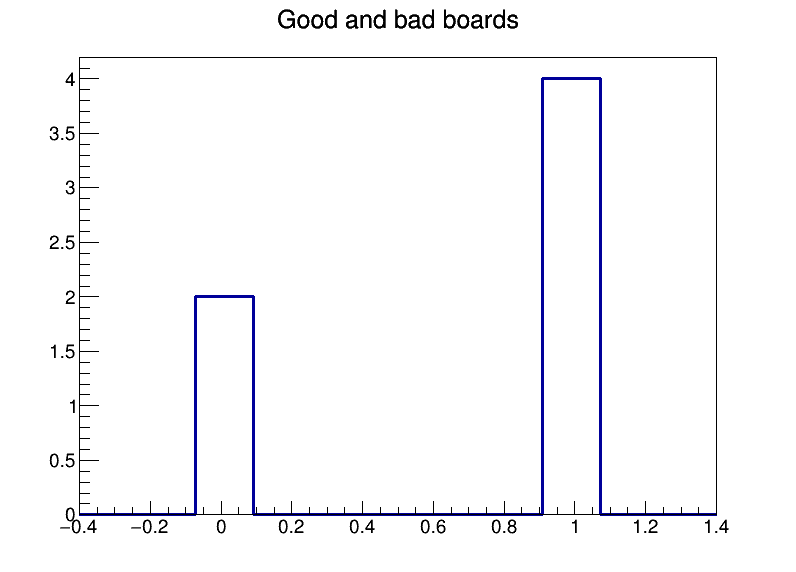

In [3]:
from ROOT import TH1F, TCanvas
sql = "SELECT id_ls, id_se, id_n, id_n2, grandtotalok FROM ATLAS_MUON_NSW_MM_PCB.final_decision"
res = db.Query(sql)

#Here we reorder the results in an array of object, for simplicity
nfields = res.GetFieldCount()
nrows = res.GetRowCount()
query_matrix=[]
fields_name_row=[]
temp_matrix_row={}
for i in range (nfields):
    fields_name_row.append(res.GetFieldName(i))
for i in range(nrows):
    row = res.Next()
    for j in range(nfields):
        temp_matrix_row.update({ fields_name_row[j]: row.GetField(j)})
    query_matrix.append(temp_matrix_row)
    temp_matrix_row={}
        

#here we plot the results. First we have to create the Canvas
c = TCanvas("Good_and_bad_boards","Good and bad boards",800,600)

#then we create the Histogram
hist1=TH1F("hsit1_gb", "Good and bad boards", 11, -0.4, 1.4)

#filling it
for row in query_matrix:
    hist1.Fill(float(row['GRANDTOTALOK']))

#we don't want statistic table on it
hist1.SetStats(0)

#now we plot the histogram on the canvas created, and then plot the canvas on our notebook
hist1.Draw()
c.Draw()

### In the following field we fill a table with the data of the previous field's query

In [4]:
from IPython.display import HTML, display

#thanks to those modules, we can write the table in HTML style
table_string="""<table>
<tr>
<th>PCB_ID</th>
<th>Is the board good?</th>
</tr>
"""
for row in query_matrix:
    if int(row['ID_N2'])<10:
        PCB_ID=row['ID_LS']+row['ID_SE']+row['ID_N']+"0"+row['ID_N2']
    else:
        PCB_ID=row['ID_LS']+row['ID_SE']+row['ID_N']+row['ID_N2']
    table_string+="<tr><td>"+PCB_ID+"</td><td>"+row['GRANDTOTALOK']+"</td></tr>"

table2display=HTML(table_string)
display(table2display)